<a href="https://colab.research.google.com/github/bonillahermes/Data_Science_Projects/blob/main/EDA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hermes Yate Bonilla
**Data Scientist**
---

**Contact:**
- **Email:** [bonillahermes@gmail.com](mailto:bonillahermes@gmail.com)
- **LinkedIn:** [linkedin.com/in/bonillahermes](https://www.linkedin.com/in/bonillahermes/)
- **GitHub:** [github.com/bonillahermes](https://github.com/bonillahermes)
- **Webpage:** [bonillahermes.com](https://bonillahermes.com/)
---

<center><h1>Ánalisis e Interpretación de Datos</header1></center>
<left><h1>Estadística descriptiva: información a partir del análisis crítico de datos</header1></left>

## Introducción

Desde comienzos del 2020, el mundo ha enfrentado desafíos sin precedentes debido a la pandemia de COVID-19. Colombia, como muchos otros países, ha sido profundamente afectada por este fenómeno global. Según el Reporte de la Organización Panamericana de la Salud (OPS/OMS, 2023), el país ha experimentado variaciones significativas en la distribución y gravedad de los casos de COVID-19. Este informe busca analizar el impacto de la pandemia en diferentes regiones de Colombia, poniendo especial atención en cómo los factores socioeconómicos y demográficos han influido en la evolución y las consecuencias de la enfermedad.

## Objetivo (Problema Estadístico):
**"Analizar el Impacto de COVID-19 en Diferentes Regiones de Colombia: Un Estudio de la Distribución de Casos y su Relación con Factores Socioeconómicos y Demográficos."**

## Justificación del Problema:
La pandemia de COVID-19 ha tenido un impacto significativo y multifacético en todo el mundo. En Colombia, como en muchos países, la distribución y severidad de los casos de COVID-19 han variado considerablemente entre regiones. Este análisis busca comprender cómo la pandemia ha afectado a diferentes áreas del país, con un enfoque particular en la relación entre la incidencia de la enfermedad y factores como el nivel socioeconómico y la demografía de cada región. Al analizar estos factores, podemos obtener insights críticos sobre:

- La disparidad en la tasa de casos y mortalidad entre diferentes regiones.
- Cómo factores socioeconómicos, como el PIB per cápita y el acceso a servicios de salud, pueden correlacionarse con la prevalencia y gravedad de la enfermedad.
- El impacto demográfico, examinando cómo variables como la edad y el género influyen en las tasas de infección y mortalidad.

Este estudio no solo ayudará a comprender mejor la dinámica actual de la pandemia en Colombia, sino que también proporcionará información valiosa para la toma de decisiones en políticas de salud pública, asignación de recursos y estrategias de mitigación para enfrentar no solo la crisis actual sino también desafíos futuros en la salud pública. Para tal propósito, se usó la base de datos del Ministerio de Salud y Protección Social, la base se puede encontrar en el siguiente [link](https://www.datos.gov.co/Salud-y-Protecci-n-Social/Casos-positivos-de-COVID-19-en-Colombia-/gt2j-8ykr/data).

## Modelos Estadísticos de Trabajo

### Análisis Descriptivo General de Casos Fallecidos:
Este modelo se enfocará en analizar los casos fallecidos por COVID-19 en Colombia, incluyendo:
- **Número total de fallecidos.**
- **Distribución de los fallecidos por edad y género.**
- **Tiempo promedio por departamento y municipio.**
- **Comparación de las tasas de mortalidad entre diferentes regiones.**
- **Correlación de factores socioeconómicos y demográficos con las tasas de mortalidad.**




## Descripción de la base de datos

### Diccionario de Datos de la Base de COVID-19

- **ID**: Identificador único para cada caso registrado.
- **Depto**: Departamento en Colombia donde se registró el caso.
- **Municipio**: Municipio donde se registró el caso.
- **Edad**: Edad de la persona afectada.
- **Sexo**: Género de la persona afectada (Femenino/Masculino).
- **Tipo de Contagio**: Categoría de contagio (Comunitaria, Relacionado, etc.).
- **Fecha_sintomas**: Fecha en que la persona empezó a mostrar síntomas.
- **Fecha_muerte**: Fecha de fallecimiento de la persona.
- **Fecha_diagnostico**: Fecha en que se confirmó el diagnóstico de COVID-19.
- **Tiempo**: Número de días entre la fecha de diagnóstico y la fecha de muerte.


In [ ]:
from google.colab import drive

# Monta tu Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import shapiro


In [ ]:
# Ruta del archivo Excel en Google Drive
ruta_archivo = '/content/drive/MyDrive/Bases/BaseLia.xlsx'

# Cargar el archivo Excel en un DataFrame de Pandas
df = pd.read_excel(ruta_archivo)
df2 = pd.read_excel(ruta_archivo, sheet_name='Hoja2')


In [ ]:
df.head()

,ID,Depto,Edad,Sexo,Tipo de contagio,Fecha_sintomas,Fecha_muerte,Fecha_diagnostico,Tiempo
0,1556982,Valle del Cauca,74,F,Comunitaria,2020-12-17,2020-12-30,2020-12-23,7
1,1556986,Valle del Cauca,66,F,Comunitaria,2020-12-11,2020-12-26,2020-12-22,4
2,1137434,Bogota,81,F,Relacionado,2020-10-31,2020-11-11,2020-11-07,4
3,1137440,Quindio,85,F,Comunitaria,2020-10-31,2020-11-12,2020-10-31,12
4,1137443,Bogota,78,M,Comunitaria,2020-10-31,2020-11-16,2020-11-07,9


In [ ]:
# Reemplazar los espacios en blanco y convertir la columna a entero
df2['Población'] = df2['Población'].str.replace(' ', '').astype(int)

df2.head()

             Depto  Población
0           Bogota    7907281
1        Antioquia    6848360
2  Valle del Cauca    4638029
3     Cundinamarca    3445327
4        Atlantico    2803565


,Depto,Población
0,Bogota,7907281
1,Antioquia,6848360
2,Valle del Cauca,4638029
3,Cundinamarca,3445327
4,Atlantico,2803565


In [ ]:
# Eliminar filas donde 'Tiempo' y 'Fecha_muerte' es NaN
df = df.dropna(subset=['Tiempo'])
df = df.dropna(subset=['Fecha_diagnostico'])

# Eliminar filas donde el valor de 'Tiempo' es 0
df = df[df['Tiempo'] != 0]

# Función para categorizar la edad
def categorizar_edad(edad):
    if edad < 13:
        return 'Niños'
    elif 13 <= edad < 18:
        return 'Adolescentes'
    elif 18 <= edad < 30:
        return 'Jóvenes'
    elif 30 <= edad < 60:
        return 'Adultos'
    else:
        return 'Adulto Mayor'

# Aplicar la función al DataFrame
df['Grupo_Edad'] = df['Edad'].apply(categorizar_edad)

# Información general sobre el DataFrame
info = df.info()

# Valores nulos
valores_nulos = df.isnull().sum()
valores_nulos

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21558 entries, 0 to 22683
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 21558 non-null  int64         
 1   Depto              21558 non-null  object        
 2   Edad               21558 non-null  int64         
 3   Sexo               21558 non-null  object        
 4   Tipo de contagio   21558 non-null  object        
 5   Fecha_sintomas     21558 non-null  datetime64[ns]
 6   Fecha_muerte       21558 non-null  datetime64[ns]
 7   Fecha_diagnostico  21558 non-null  datetime64[ns]
 8   Tiempo             21558 non-null  int64         
 9   Grupo_Edad         21558 non-null  object        
dtypes: datetime64[ns](3), int64(3), object(4)
memory usage: 1.8+ MB


ID                   0
Depto                0
Edad                 0
Sexo                 0
Tipo de contagio     0
Fecha_sintomas       0
Fecha_muerte         0
Fecha_diagnostico    0
Tiempo               0
Grupo_Edad           0
dtype: int64

# Análisis Descriptivo General de Casos Fallecidos:

In [ ]:
# Número total de fallecidos
total_fallecidos = df.shape[0]
print('El número total de fallecidos es:',total_fallecidos)


El número total de fallecidos es: 21558


In [ ]:
# Función para añadir etiquetas de cantidad en las barras
def add_labels(ax):
    for bar in ax.patches:
        ax.annotate(format(bar.get_height(), '.0f'),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='center',
                     size=10, xytext=(0, 8),
                     textcoords='offset points')


# Cantidad de Fallecidos por Sexo

El gráfico presenta una comparación visual entre la cantidad de fallecidos masculinos y femeninos a causa de COVID-19. Se observa que la cantidad de fallecidos masculinos (13,058) supera a la de las fallecidas femeninas (8,500), indicando una mayor incidencia de mortalidad por COVID-19 en hombres en el conjunto de datos analizado.

Esta diferencia podría reflejar varios factores subyacentes, como diferencias biológicas, comportamentales o de exposición al virus entre hombres y mujeres. Estudios previos han sugerido que los hombres podrían ser más susceptibles a formas graves de COVID-19, lo cual se alinea con la tendencia observada en los datos. Adicionalmente, factores como la prevalencia de comorbilidades, ocupaciones con mayor exposición al virus, y diferencias en la búsqueda de atención médica, podrían contribuir a las disparidades observadas.

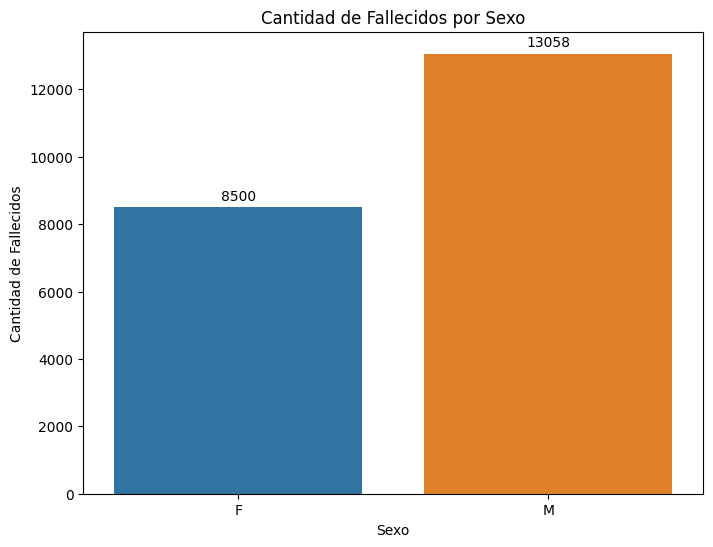

In [ ]:
# Gráfico para mostrar la cantidad de fallecidos por Sexo
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Sexo')
plt.title('Cantidad de Fallecidos por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad de Fallecidos')
add_labels(ax)
plt.show()


# Cantidad de Fallecidos por Grupo de Edad

El gráfico muestra la distribución de fallecimientos por COVID-19 entre diferentes grupos de edad. Es notable la mayor incidencia en el grupo de los adultos mayores, con 14,757 fallecidos, lo que subraya la vulnerabilidad de este segmento poblacional ante la enfermedad. Por otro lado, los grupos de niños y adolescentes presentan cifras considerablemente menores, con 25 y 16 fallecidos respectivamente, lo que podría reflejar una menor susceptibilidad o una menor exposición al virus en estas edades.

El grupo de los jóvenes muestra 275 fallecimientos, lo cual, aunque superior a niños y adolescentes, sigue siendo significativamente menor en comparación con los adultos y ancianos. Por su parte, el grupo de adultos registra 6,485 fallecidos, situándose en un punto intermedio entre los jóvenes y los ancianos.

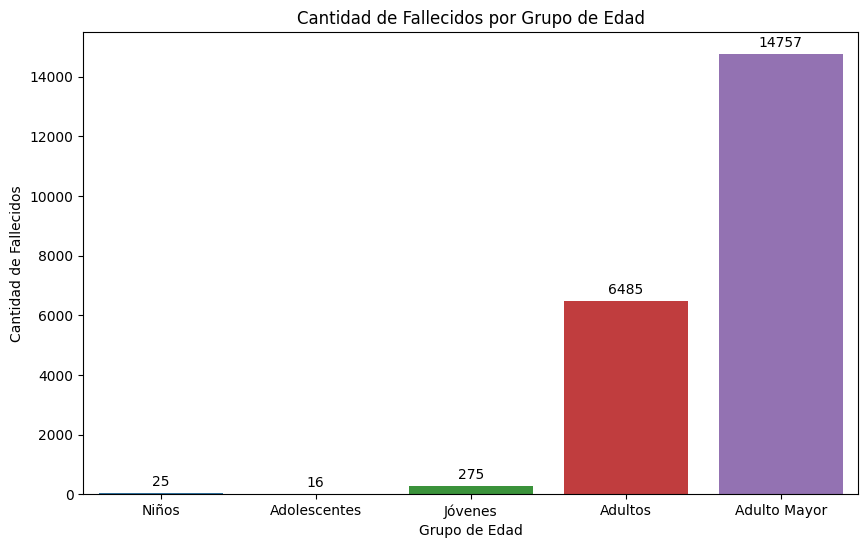

In [ ]:
# Gráfico para mostrar la cantidad de fallecidos por Grupo de Edad
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Grupo_Edad', order=['Niños', 'Adolescentes', 'Jóvenes', 'Adultos', 'Adulto Mayor'])
plt.title('Cantidad de Fallecidos por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Cantidad de Fallecidos')
add_labels(ax)
plt.show()

# Distribución de Edad por Departamento

El diagrama de cajas ilustra la distribución de la edad de los fallecidos por COVID-19 en los cinco departamentos con la mayor cantidad de muertes. La mediana, representada por la línea que divide cada caja, indica la edad media de los fallecidos en cada departamento. Los valores atípicos, indicados por los puntos fuera de las "bigotes" del diagrama de cajas, sugieren la presencia de fallecidos que son notablemente más jóvenes o mayores que la mayoría de los casos en su departamento respectivo.

De una observación inicial, se puede apreciar que la mediana de la edad de los fallecidos es mayor en departamentos como Cundinamarca, lo que sugiere una población de fallecidos con una edad promedio más elevada en comparación con otros departamentos como Valle del Cauca. Los "bigotes" que se extienden hacia abajo en cada caja indican que hay una cantidad significativa de fallecidos más jóvenes en todos los departamentos, pero es particularmente notable en Bogotá y Valle del Cauca.


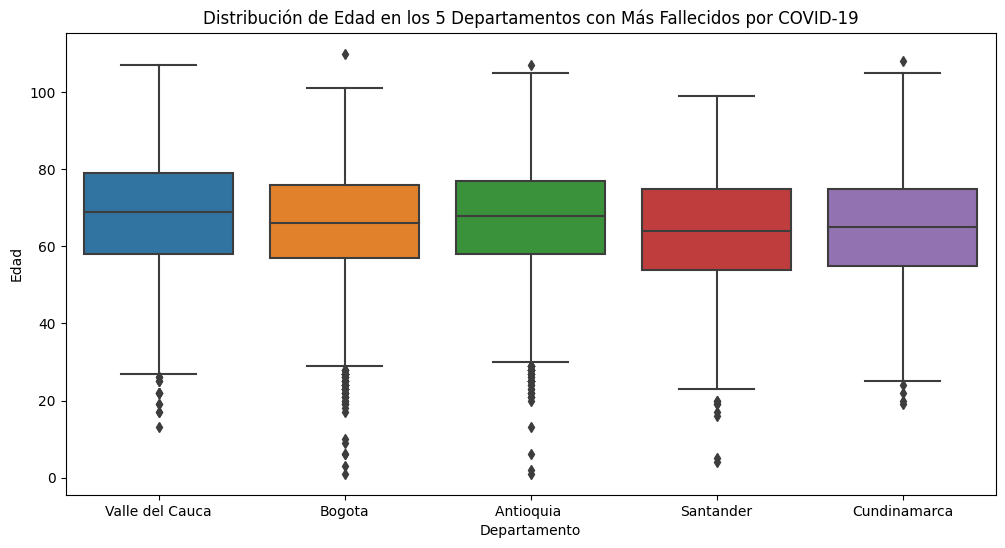

In [ ]:
# Encontrar los 5 departamentos con más fallecidos
top_5_departamentos = df['Depto'].value_counts().head(5).index

# Filtrar el DataFrame para incluir solo los datos de estos departamentos
df_top_5_departamentos = df[df['Depto'].isin(top_5_departamentos)]

# Crear un diagrama de cajas para estos departamentos
plt.figure(figsize=(12, 6))
sns.boxplot(x='Depto', y='Edad', data=df_top_5_departamentos)
plt.title('Distribución de Edad en los 5 Departamentos con Más Fallecidos por COVID-19')
plt.xlabel('Departamento')
plt.ylabel('Edad')
plt.show()


## Matriz de Correlación de Variables Cuantitativas

La matriz de correlación visualizada en el gráfico proporciona una representación de las relaciones lineales entre las variables cuantitativas de la base de datos. Los valores de correlación varían entre -1 y 1, donde 1 indica una correlación positiva perfecta, -1 indica una correlación negativa perfecta, y 0 indica ninguna correlación lineal. Los puntos clave de esta matriz incluyen:

- **Edad** y **Tiempo**  muestran una correlación cercana a cero, lo que indica que no hay una relación lineal clara entre la edad de los individuos y el tiempo transcurrido desde el diagnóstico hasta el fallecimiento.




<ipython-input-73-3ad5bd689c2d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


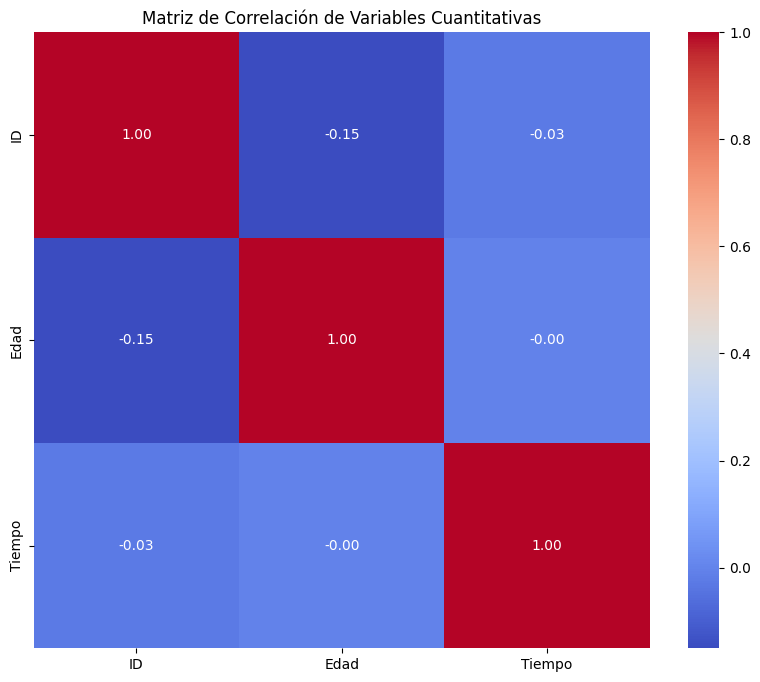

In [ ]:
# Calcula la matriz de correlación
corr_matrix = df.corr()

# Crea un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# Mostrar el gráfico
plt.title('Matriz de Correlación de Variables Cuantitativas')
plt.show()

# Tiempo Promedio hasta Fallecimiento por COVID-19 por Departamento

La tabla a continuación muestra el tiempo promedio, en días, desde el diagnóstico de COVID-19 hasta el fallecimiento de los pacientes por departamento en Colombia. Los datos revelan variaciones significativas que podrían estar influenciadas por múltiples factores, como la capacidad de respuesta del sistema de salud, las prácticas de registro de casos, y la gravedad de la pandemia en cada región.

- **Caqueta**, **Huila**, y **Risaralda** destacan con los tiempos promedio más elevados, superando los 100 días. Estos largos períodos podrían indicar casos con extendidas hospitalizaciones o retrasos en la notificación de fallecimientos.
- **Atlántico** y **Norte de Santander** presentan tiempos promedio superiores a la mayoría de los departamentos, sugiriendo potencialmente una progresión más lenta de la enfermedad o una capacidad de ofrecer tratamientos prolongados.
- **Vaupes** y **Vichada** tienen los tiempos promedio más cortos, reflejando posiblemente una rápida progresión del virus o diferencias en los procesos de reporte.
- Departamentos con grandes centros urbanos como **Bogotá** y **Valle del Cauca** muestran tiempos promedio que superan los 30 días, lo que podría ser indicativo de una combinación compleja de factores, incluyendo la carga en los sistemas de salud y la variabilidad en el acceso a cuidados médicos.

Estos resultados subrayan la necesidad de considerar el contexto local y las características específicas de los sistemas de salud al interpretar el tiempo promedio hasta el fallecimiento y destacan la importancia de estrategias de salud pública adaptadas a cada región para abordar la pandemia de manera efectiva.


In [ ]:
# Calcular el tiempo promedio de fallecimiento por departamento
tiempo_promedio_por_depto = df.groupby('Depto')['Tiempo'].mean().reset_index()

# Renombrar las columnas para mayor claridad
tiempo_promedio_por_depto.columns = ['Depto', 'Tiempo_Promedio']

# Mostrar los resultados
print(tiempo_promedio_por_depto)



                       Depto  Tiempo_Promedio
0                   Amazonas        13.076923
1                 Antioquia         26.287535
2                     Arauca        13.732394
3                  Atlantico        63.757377
4                     Bogota        32.143970
5                    Bolivar        15.468208
6                     Boyaca        14.824834
7                     Caldas        13.708245
8                    Caqueta       354.907692
9                   Casanare        14.345178
10                     Cauca        14.634146
11                     Cesar        14.798148
12                     Choco        17.840000
13                   Cordoba        14.649502
14              Cundinamarca        46.333811
15                   Guainia        12.750000
16                   Guajira        13.967532
17                  Guaviare        14.958333
18                     Huila       125.344388
19                 Magdalena        12.563433
20                      Meta      

# Tasa de Mortalidad por COVID-19 por Departamento

La siguiente tabla muestra la tasa de mortalidad por cada 100,000 habitantes en distintos departamentos de Colombia. Esta métrica es crucial para comprender el impacto relativo de la pandemia en cada región, ajustando por la población total de cada departamento:

- **Bogotá** encabeza la lista con la tasa de mortalidad más alta, 64.91, lo que refleja un impacto significativo de COVID-19 en la capital del país.
- **Valle del Cauca**, **Cundinamarca**, y **Santander** también muestran tasas de mortalidad elevadas, superando los 40.0, destacando la severidad de la pandemia en estas regiones.
- **Atlántico** y **Norte de Santander** presentan tasas por encima de 30.0, sugiriendo desafíos importantes en la gestión de la crisis sanitaria.
- Departamentos como **Cesar**, **Nariño**, **Tolima**, y **Risaralda** mantienen tasas en el rango de 30.0 a 40.0, indicando una presencia notable del virus.
- Notablemente, **Bolivar**, **Caqueta**, **Putumayo**, **Choco**, **Arauca**, **Amazonas**, **Guaviare**, **Vichada**, y **Vaupes** presentan las tasas más bajas, algunas por debajo de 15.0, lo que podría reflejar una menor incidencia de la enfermedad o, potencialmente, diferencias en la detección y reporte de casos.

Es importante reconocer que la tasa de mortalidad es una medida que depende de la precisión en la notificación de fallecimientos y la calidad de los datos demográficos.


In [ ]:
# Número total de fallecidos por departamento
fallecidos_por_depto = df['Depto'].value_counts().reset_index()
fallecidos_por_depto.columns = ['Depto', 'Fallecidos']

# Asegúrate de que las columnas 'Depto' en ambos DataFrames estén en el mismo formato
df_merged = pd.merge(fallecidos_por_depto, df2, on='Depto')

# Tasa de mortalidad: (Número de fallecidos / Población) * 100,000
df_merged['Tasa_Mortalidad'] = (df_merged['Fallecidos'] / df_merged['Población']) * 100000

# Mostrar las tasas de mortalidad por departamento
print(df_merged[['Depto', 'Tasa_Mortalidad']])


                 Depto  Tasa_Mortalidad
0               Bogota        64.914855
1      Valle del Cauca        45.126928
2         Cundinamarca        40.518650
3            Santander        56.212499
4            Atlantico        32.637018
5   Norte de Santander        37.542582
6              Cordoba        31.702381
7                Cesar        39.313299
8               Nariño        31.184358
9               Tolima        37.253053
10              Caldas        45.468353
11              Boyaca        34.724361
12               Huila        33.263949
13           Risaralda        39.493821
14                Meta        33.802767
15               Sucre        29.374484
16           Magdalena        17.912487
17             Quindio        42.800617
18               Cauca        13.157515
19            Casanare        42.114264
20             Bolivar         7.698185
21             Caqueta        30.584421
22            Putumayo        31.850293
23               Choco        12.602119


# Estadísticas Descriptivas de los Departamentos con Mayor Mortalidad por COVID-19

La tabla resume las estadísticas descriptivas para los cinco departamentos en Colombia con el mayor número de fallecimientos debido a COVID-19. Los datos incluyen el conteo de casos, edad promedio, y tiempo promedio desde el diagnóstico hasta el fallecimiento, entre otras métricas.

### Antioquia
- **Casos Registrados**: 3610
- **Edad Promedio de Fallecidos**: 66.7 años
- **Tiempo Promedio hasta el Fallecimiento**: 26 días
- **Variabilidad**: Extremadamente alta con una desviación estándar de 732 días, indicando variaciones significativas en los tiempos reportados.

### Bogotá
- **Casos Registrados**: 5133
- **Edad Promedio de Fallecidos**: 65.7 años
- **Tiempo Promedio hasta el Fallecimiento**: 32 días
- **Variabilidad**: Muy alta con una desviación estándar de 871 días, sugiriendo posibles anomalías en los datos.

### Cundinamarca
- **Casos Registrados**: 1396
- **Edad Promedio de Fallecidos**: 64.7 años
- **Tiempo Promedio hasta el Fallecimiento**: 46 días
- **Variabilidad**: La más alta con una desviación estándar de 1176 días, lo que podría reflejar inconsistencias en la recopilación o reporte de datos.

### Santander
- **Casos Registrados**: 1325
- **Edad Promedio de Fallecidos**: 64 años
- **Tiempo Promedio hasta el Fallecimiento**: 14 días
- **Variabilidad**: Relativamente baja con una desviación estándar de 15 días, mostrando menos variación en el tiempo hasta el fallecimiento.

### Valle del Cauca
- **Casos Registrados**: 2093
- **Edad Promedio de Fallecidos**: 67.6 años
- **Tiempo Promedio hasta el Fallecimiento**: 34 días
- **Variabilidad**: Alta con una desviación estándar de 963 días, indicando la presencia de valores atípicos.

Estas cifras ilustran la complejidad y diversidad de la pandemia en Colombia.


In [ ]:
# Calcular estadísticos descriptivos para estos departamentos
estadisticos_descriptivos = df_top_5_departamentos.groupby('Depto').describe()

# Mostrar los resultados
print(estadisticos_descriptivos)


                     ID                                                  \
                  count          mean           std      min        25%   
Depto                                                                     
Antioquia        3610.0  2.530190e+06  8.764218e+05  11992.0  2500197.0   
Bogota           5133.0  2.489663e+06  1.151255e+06    415.0  1677388.0   
Cundinamarca     1396.0  2.657102e+06  1.033693e+06  13485.0  2550412.5   
Santander        1325.0  2.646883e+06  1.095574e+06  38291.0  1830857.0   
Valle del Cauca  2093.0  2.392700e+06  1.130666e+06  11825.0  1408701.0   

                                                     Edad             ...  \
                       50%         75%        max   count       mean  ...   
Depto                                                                 ...   
Antioquia        2646899.5  2886840.75  4905796.0  3610.0  66.690859  ...   
Bogota           2837248.0  3380154.00  4388007.0  5133.0  65.739723  ...   
Cundinamarca  

## Distribución de Fallecimientos por COVID-19 por Género en Departamentos Colombianos

La tabla muestra el desglose de fallecimientos por COVID-19 entre géneros femenino (F) y masculino (M) en varios departamentos de Colombia. Se observa una tendencia general de mayor número de fallecimientos en hombres en comparación con mujeres en la mayoría de los departamentos. Por ejemplo:

- En **Antioquia**, el número de fallecidos masculinos (2108) supera al de femeninos (1502), sugiriendo una mayor incidencia de mortalidad entre la población masculina.
- **Bogotá** muestra una diferencia aún más marcada con 3205 fallecimientos masculinos frente a 1928 femeninos.
- Departamentos como **Cundinamarca** y **Valle del Cauca** también reflejan esta tendencia con 837 y 1260 fallecimientos masculinos respectivamente, en contraste con 559 y 833 fallecimientos femeninos.
- En regiones con menores poblaciones como **Amazonas**, **Guainia**, y **Vaupes**, las cifras son menores, pero se mantiene la tendencia de mayor mortalidad masculina.

Estos patrones son consistentes con las tendencias observadas a nivel global, donde se ha reportado una mayor tasa de mortalidad por COVID-19 en hombres que en mujeres. Factores como diferencias biológicas, comorbilidades prevalentes, y comportamientos de riesgo pueden influir en esta discrepancia.

In [ ]:
# Calcular la cantidad de fallecidos por departamento y sexo
fallecidos_por_depto_sexo = df.groupby(['Depto', 'Sexo']).size().unstack(fill_value=0)

# Mostrar la tabla
print(fallecidos_por_depto_sexo)


Sexo                         F     M
Depto                               
Amazonas                     9    17
Antioquia                 1502  2108
Arauca                      32    39
Atlantico                  384   531
Bogota                    1928  3205
Bolivar                     72   101
Boyaca                     172   279
Caldas                     170   303
Caqueta                     41    89
Casanare                    78   119
Cauca                       85   120
Cesar                      207   333
Choco                       37    38
Cordoba                    244   358
Cundinamarca               559   837
Guainia                      2     6
Guajira                    134   174
Guaviare                     8    16
Huila                      159   233
Magdalena                  102   166
Meta                       142   240
Nariño                     216   314
Norte de Santander         257   380
Putumayo                    50    72
Quindio                     92   149
R

# Conclusiones

A partir del análisis detallado de los datos de COVID-19 en Colombia, podemos extraer varias conclusiones significativas que pueden ayudar a orientar las políticas de salud pública y las estrategias de intervención futuras:

### Mayor Vulnerabilidad en Poblaciones Mayores
Los datos revelan que los ancianos son el grupo de edad más afectado por la mortalidad de COVID-19, lo que refleja una clara vulnerabilidad relacionada con la edad. Estrategias como la priorización de vacunación y cuidados intensivos para las poblaciones mayores podrían ser medidas efectivas para reducir la tasa de mortalidad en esta demografía.

### Disparidad de Mortalidad por Género
Se ha observado una tendencia generalizada de una mayor tasa de mortalidad en hombres en comparación con mujeres. Este hallazgo está en consonancia con las tendencias globales y subraya la necesidad de investigar más profundamente las causas de dicha disparidad para desarrollar respuestas adaptadas a las necesidades específicas de género.

### Variabilidad Regional en la Tasa de Mortalidad
Existe una notable variabilidad en las tasas de mortalidad y el tiempo promedio hasta el fallecimiento entre los diferentes departamentos. Mientras algunos departamentos presentan tasas y tiempos promedio relativamente bajos, otros muestran cifras significativamente más altas. Estas diferencias pueden ser indicativas de variaciones en la calidad del sistema de salud, las respuestas de política pública y las prácticas culturales, lo que requiere una respuesta diferenciada y contextualizada a nivel departamental.

Estas conclusiones proporcionan una visión esencial sobre el impacto de la pandemia y pueden servir como base para el fortalecimiento de las medidas preventivas y terapéuticas, así como para mejorar los sistemas de seguimiento y reporte de datos sobre COVID-19 en Colombia.


# Referencias
- Organización Panamericana de la Salud. (2023). Reporte de situación COVID-19 Colombia No. 292 - 26 de enero 2023. Recuperado de https://www.paho.org/es/documentos/reporte-situacion-covid-19-colombia-no-292-26-enero-2023.